In [1]:
from IPython.core.debugger import Tracer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [2]:
#%run ./data.ipynb

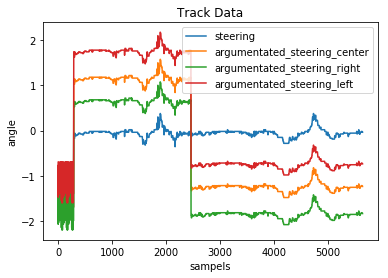

(5647, 11)


index                                             center  \
0        22  ./track_data/andy_track1_exit_correction/IMG/c...   
1        23  ./track_data/andy_track1_exit_correction/IMG/c...   
2        24  ./track_data/andy_track1_exit_correction/IMG/c...   
3        25  ./track_data/andy_track1_exit_correction/IMG/c...   
4        26  ./track_data/andy_track1_exit_correction/IMG/c...   
5        27  ./track_data/andy_track1_exit_correction/IMG/c...   
6        28  ./track_data/andy_track1_exit_correction/IMG/c...   
7        29  ./track_data/andy_track1_exit_correction/IMG/c...   
8        30  ./track_data/andy_track1_exit_correction/IMG/c...   
9        31  ./track_data/andy_track1_exit_correction/IMG/c...   
10       32  ./track_data/andy_track1_exit_correction/IMG/c...   
11       33  ./track_data/andy_track1_exit_correction/IMG/c...   
12       34  ./track_data/andy_track1_exit_correction/IMG/c...   
13       41  ./track_data/andy_track1_exit_correction/IMG/c...   
14       42  ./track_data/andy_track1_exit_correction/IMG/c...   
15       43  ./track_data/andy_track1_exit_correction/IMG/c...   
16       44  ./track_data/andy_track1_exit_correction/IMG/c...   
17       45  ./track_data/andy_track1_exit_correction/IMG/c...   
18       46  ./track_data/andy_track1_exit_correction/IMG/c...   
19       47  ./track_data/andy_track1_exit_correction/IMG/c...   
20       48  ./track_data/andy_track1_exit_correction/IMG/c...   
21       49  ./track_data/andy_track1_exit_correction/IMG/c...   
22       50  ./track_data/andy_track1_exit_correction/IMG/c...   
23       51  ./track_data/andy_track1_exit_correction/IMG/c...   
24       52  ./track_data/andy_track1_exit_correction/IMG/c...   
25       53  ./track_data/andy_track1_exit_correction/IMG/c...   
26       54  ./track_data/andy_track1_exit_correction/IMG/c...   
27       55  ./track_data/andy_track1_exit_correction/IMG/c...   
28       56  ./track_data/andy_track1_exit_correction/IMG/c...   
29       57  ./track_data/andy_track1_exit_correction/IMG/c...   
...     ...                                                ...   
5617   3561  ./track_data/andy_track1_right/IMG/center_2017...   
5618   3562  ./track_data/andy_track1_right/IMG/center_2017...   
5619   3563  ./track_data/andy_track1_right/IMG/center_2017...   
5620   3564  ./track_data/andy_track1_right/IMG/center_2017...   
5621   3565  ./track_data/andy_track1_right/IMG/center_2017...   
5622   3566  ./track_data/andy_track1_right/IMG/center_2017...   
5623   3567  ./track_data/andy_track1_right/IMG/center_2017...   
5624   3568  ./track_data/andy_track1_right/IMG/center_2017...   
5625   3569  ./track_data/andy_track1_right/IMG/center_2017...   
5626   3570  ./track_data/andy_track1_right/IMG/center_2017...   
5627   3571  ./track_data/andy_track1_right/IMG/center_2017...   
5628   3588  ./track_data/andy_track1_right/IMG/center_2017...   
5629   3589  ./track_data/andy_track1_right/IMG/center_2017...   
5630   3590  ./track_data/andy_track1_right/IMG/center_2017...   
5631   3591  ./track_data/andy_track1_right/IMG/center_2017...   
5632   3592  ./track_data/andy_track1_right/IMG/center_2017...   
5633   3593  ./track_data/andy_track1_right/IMG/center_2017...   
5634   3594  ./track_data/andy_track1_right/IMG/center_2017...   
5635   3595  ./track_data/andy_track1_right/IMG/center_2017...   
5636   3596  ./track_data/andy_track1_right/IMG/center_2017...   
5637   3597  ./track_data/andy_track1_right/IMG/center_2017...   
5638   3598  ./track_data/andy_track1_right/IMG/center_2017...   
5639   3599  ./track_data/andy_track1_right/IMG/center_2017...   
5640   3600  ./track_data/andy_track1_right/IMG/center_2017...   
5641   3601  ./track_data/andy_track1_right/IMG/center_2017...   
5642   3602  ./track_data/andy_track1_right/IMG/center_2017...   
5643   3603  ./track_data/andy_track1_right/IMG/center_2017...   
5644   3604  ./track_data/andy_track1_right/IMG/center_2017...   
5645   3605  ./track_data/andy_track1_right/IM

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read csv
def get_csv(path,offset_argumented_steering_left = 0.3 ,offset_argumented_steering_center = 0,offset_argumented_steering_right = -0.3):
    # load CSV & drop zeros
    df = pd.read_csv(path+'driving_log.csv')
    df = df.drop(df[df['steering'] == 0.].index)
    df = df.drop(df[df['speed'] < 1.].index)
    df['center'] = path+df['center']
    df['right'] = path+df['right']
    df['left'] = path+df['left']
    df['argumentated_steering_center'] = df['steering'] + offset_argumented_steering_center
    df['argumentated_steering_right' ] = df['steering'] + offset_argumented_steering_right
    df['argumentated_steering_left'  ] = df['steering'] + offset_argumented_steering_left
    return df

c1 =  .7
c2 = 1.2
c3 = 1.8

tracks = [#get_csv('./track_data/andy_track1_offroad/'),\
          #get_csv('./track_data/andy_track1_offroad2/'),\
          get_csv('./track_data/andy_track1_exit_correction/'),\
          get_csv('./track_data/andy_track1_exit_correction/'),\
          get_csv('./track_data/andy_track1_exit_correction/'),\
          #get_csv('./track_data/data/'),\
          #get_csv('./track_data/peters_drive/'),\
          #get_csv('./track_data/andy_track1_backward/'),\
          #get_csv('./track_data/andy_track1_forward/'),\
          #get_csv('./track_data/andy_track1_exact_drive/'),\
          #get_csv('./track_data/andy_track1_exact_drive2/'),\
          #get_csv('./track_data/andy_track1_exact_drive3/'),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          get_csv('./track_data/andy_track1_left/',c3,c2,c1),\
          get_csv('./track_data/andy_track1_right/',-c1,-c2,-c3),\
          
          #get_csv('./track_data/andy_track2_center_forward/'),\
          #get_csv('./track_data/andy_track2_left_forward/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_right_forward/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_center_forward/'),\
          #get_csv('./track_data/andy_track2_left_forward/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_right_forward/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_center_backward/'),\
          #get_csv('./track_data/andy_track2_center_digital_backward/'),\
          
          #get_csv('./track_data/andy_track2_shadows/'),\
          #get_csv('./track_data/andy_track2_shadows/'),\
          #get_csv('./track_data/andy_track2_shadows/'),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          #get_csv('./track_data/andy_track2_shadows_right/',-c1,-c2,-c3),\
          #get_csv('./track_data/andy_track2_shadows_left/',c3,c2,c1),\
          
         ]
df = pd.concat(tracks).reset_index()

def plot_steering(df):
    ### plot 
    cols = ['steering','argumentated_steering_center','argumentated_steering_right','argumentated_steering_left']
    plt.plot(df[cols])
    plt.title('Track Data')
    plt.ylabel('angle')
    plt.xlabel('sampels')
    plt.legend(cols, loc='upper right')
    #plt.yscale('log')
    plt.show()
    
plot_steering(df)
print(df.shape)
df

In [3]:
# split data
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=1/11, random_state=42)

In [4]:
# generate argumentated batch
from sklearn.utils import shuffle
import traceback
import sys
from drive import Preprocess

class Batch():
    # argumentation and batching parameters:
    argumentations = 6

    def __init__(self):
        pass

    def fill_batch(self,df,idxes,batch_size_single):
        #try:
        batch_y            = np.empty(list([batch_size_single*self.argumentations]))
        batch_x            = np.empty(list([batch_size_single*self.argumentations]) + list(Preprocess.image_shape))

        idx_b = 0
        cnt = 0
        for idx in idxes:
            #print(df['argumentated_steering_center'].iloc[idx])
            #print([idx])
            batch_y[0+idx_b]         = (df['argumentated_steering_center'].iloc[idx])
            batch_y[1+idx_b]         = (df['argumentated_steering_left'  ].iloc[idx])
            batch_y[2+idx_b]         = (df['argumentated_steering_right' ].iloc[idx])
            batch_x[0+idx_b,:,:,0:3] = (cv2.imread(df['center'].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[1+idx_b,:,:,0:3] = (cv2.imread(df['left'  ].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[2+idx_b,:,:,0:3] = (cv2.imread(df['right' ].iloc[idx].replace(" ", "").replace("\\", "/")))
            batch_x[0+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[0+idx_b,:,:,0:3])
            batch_x[1+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[1+idx_b,:,:,0:3])
            batch_x[2+idx_b,:,:]     = Preprocess.preprocess_image(batch_x[2+idx_b,:,:,0:3])
            # Training only argumentation on HSV Value
            batch_x[0+idx_b,:,:,2]  *= 2*np.random.random()
            batch_x[1+idx_b,:,:,2]  *= 2*np.random.random()
            batch_x[2+idx_b,:,:,2]  *= 2*np.random.random()
            #Add mirrored Version
            batch_y[3+idx_b]      = -batch_y[0+idx_b]
            batch_y[4+idx_b]      = -batch_y[1+idx_b]
            batch_y[5+idx_b]      = -batch_y[2+idx_b]
            batch_x[3+idx_b]      = batch_x[0+idx_b][:,-1::-1]
            batch_x[4+idx_b]      = batch_x[1+idx_b][:,-1::-1]
            batch_x[5+idx_b]      = batch_x[2+idx_b][:,-1::-1]
            idx_b += self.argumentations


        assert(not(np.isnan((np.sum(batch_x))))), 'is nan'
        assert(not(np.isnan((np.sum(batch_y))))), 'is nan'
        cnt +=1
        #return (batch_x,batch_y,weights)
        return (batch_x,batch_y)
        #return shuffle(batch_x,batch_y)


    def get_random_batch(self,df,batch_size_single): 
        n_split   = int(len(df)//batch_size_single)-1
        batch_idx = (df[:batch_size_single*n_split].index.values)   
        batch_idx = shuffle(batch_idx)
        batch_idx = batch_idx.reshape(n_split,batch_size_single,)
        while 1:
            #print('\r\nget_batch: start ',flush=True)
            cnt = 0
            for idxes in batch_idx:
                try:
                    yield (self.fill_batch(df,idxes,batch_size_single))
                except:
                    print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
                    raise

                    
    def get_stratified_batch(self,df,batch_size_single):
        from sklearn.model_selection import StratifiedShuffleSplit
        random_state=42
        while 1:
            sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=random_state)
            train_index, test_index = next(sss.split(df.index.values.copy(), df['classes']))
            n_split = int(len(train_index)//batch_size_single)-1
            batch_idx = (train_index[:batch_size_single*n_split])   
            batch_idx = shuffle(batch_idx)
            batch_idx = batch_idx.reshape(n_split,batch_size_single,)
            cnt = 0
            for idxes in batch_idx:
                batch_x,batch_y = (self.fill_batch(df,idxes,batch_size_single))
                yield batch_x,batch_y


batch = Batch()

batch_size_single = 6
train_generator = batch.get_random_batch(df=df, batch_size_single=batch_size_single)
validation_generator = batch.get_random_batch(df=df, batch_size_single=batch_size_single)


batch_x,batch_y = next(train_generator)


Using TensorFlow backend.


(36, 160, 320, 6)


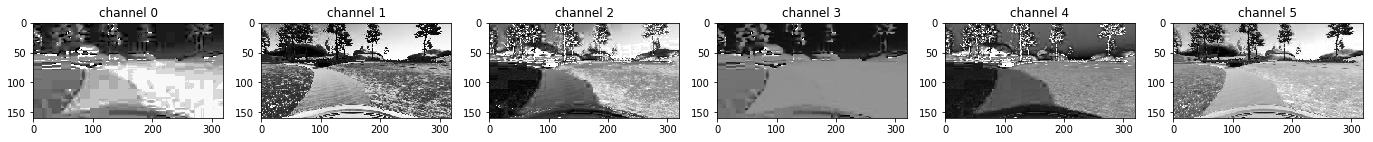

steering: -1.0, idx: 0


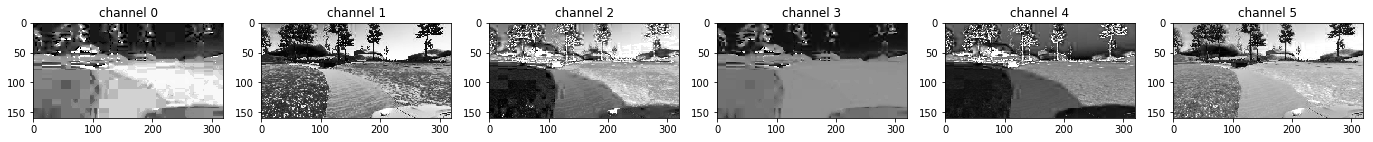

steering: -0.7, idx: 1


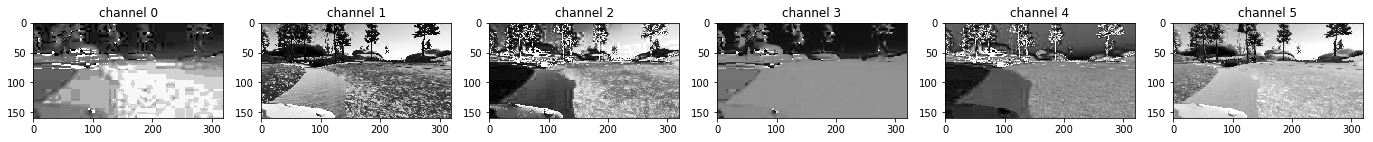

steering: -1.3, idx: 2


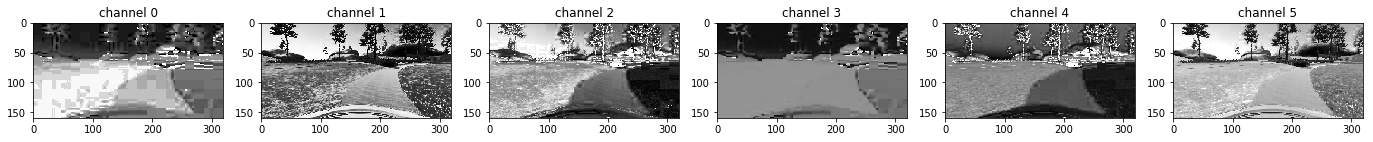

steering: 1.0, idx: 3


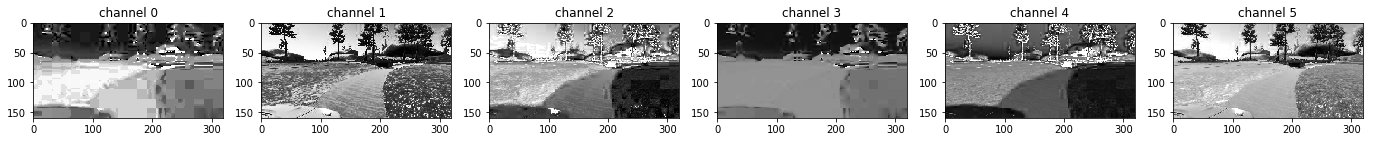

steering: 0.7, idx: 4


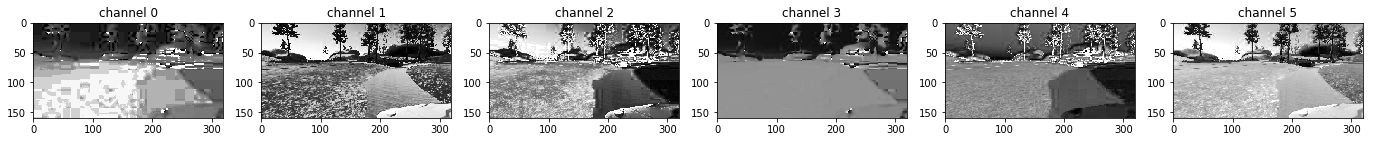

steering: 1.3, idx: 5


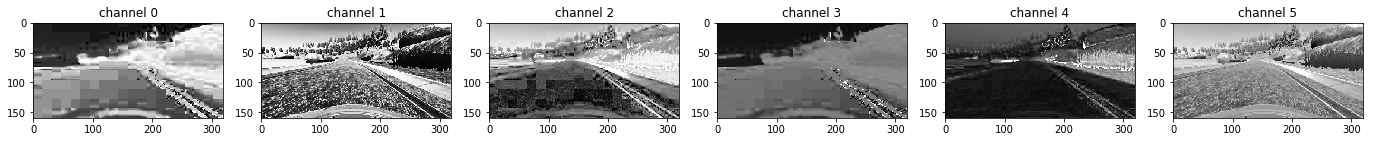

steering: -1.23773585, idx: 6


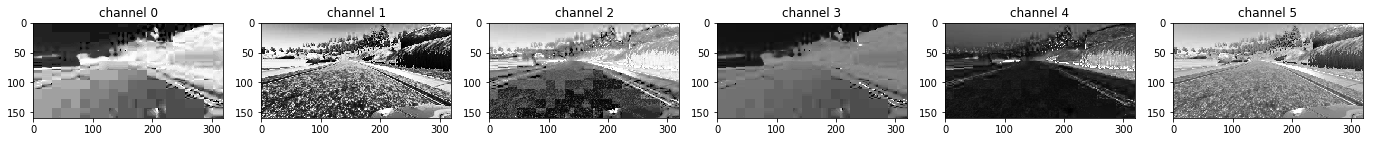

steering: -0.73773585, idx: 7


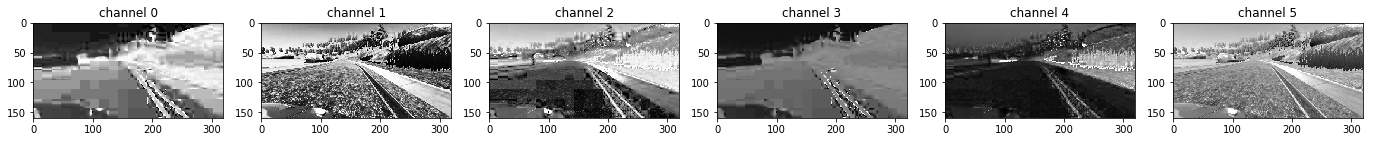

steering: -1.83773585, idx: 8


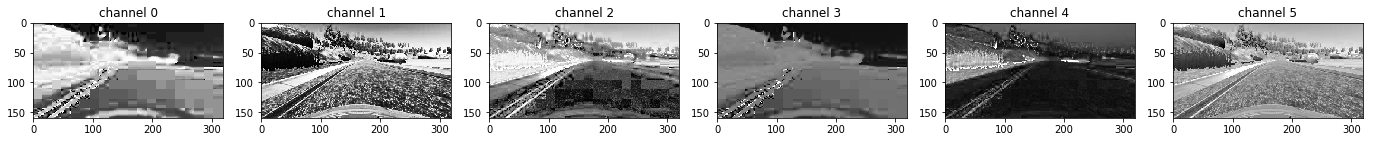

steering: 1.23773585, idx: 9


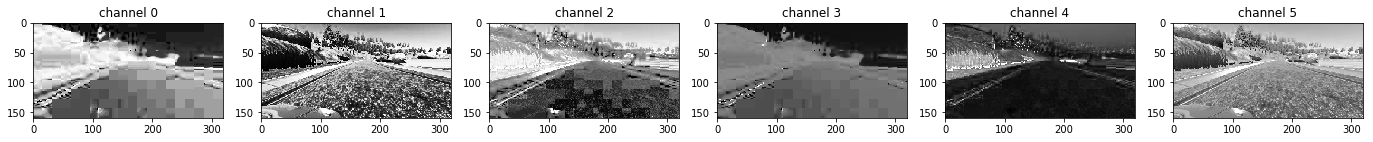

steering: 0.73773585, idx: 10


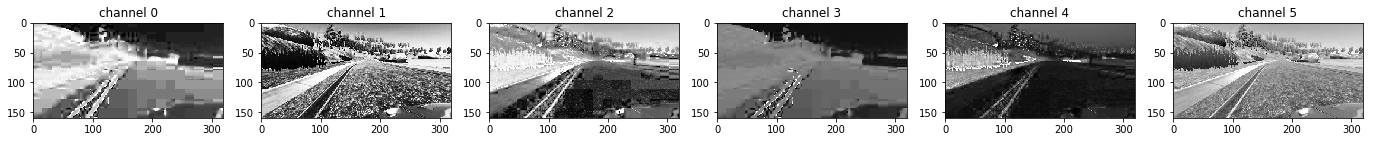

steering: 1.83773585, idx: 11


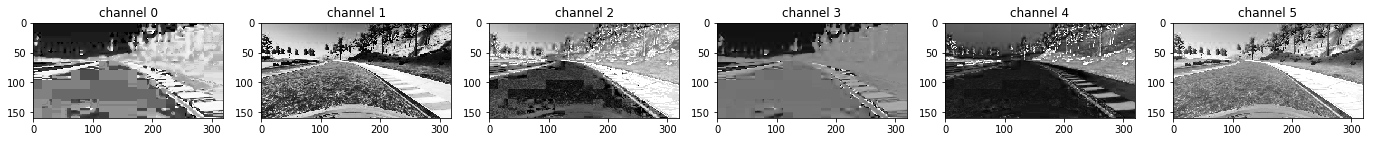

steering: -1.23773585, idx: 12


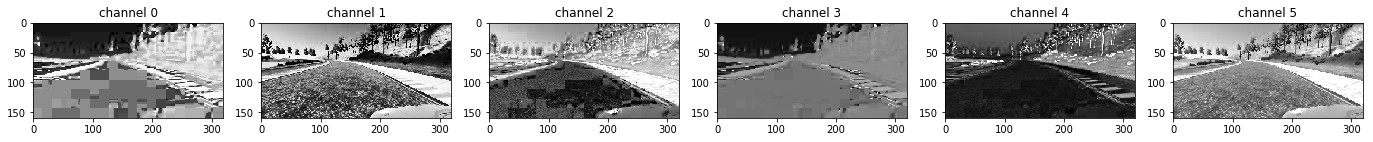

steering: -0.73773585, idx: 13


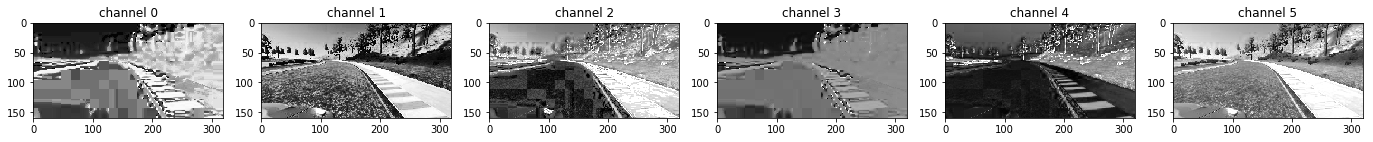

steering: -1.83773585, idx: 14


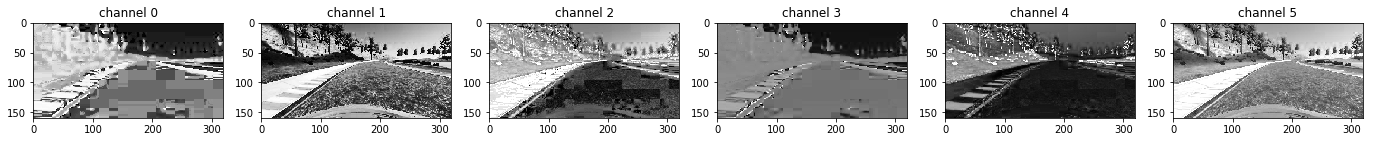

steering: 1.23773585, idx: 15


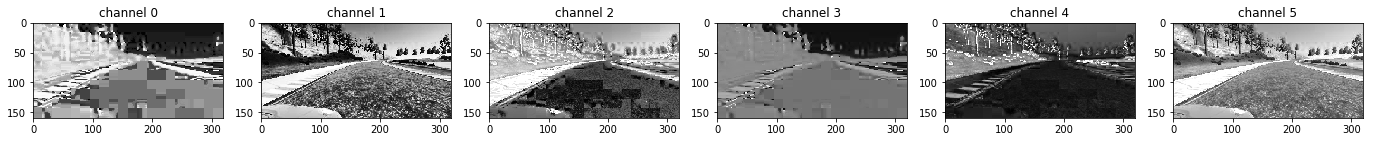

steering: 0.73773585, idx: 16


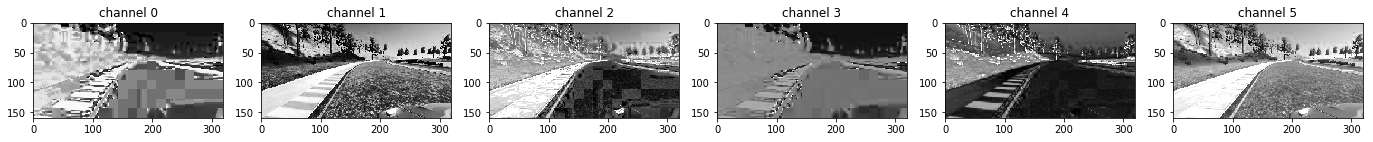

steering: 1.83773585, idx: 17


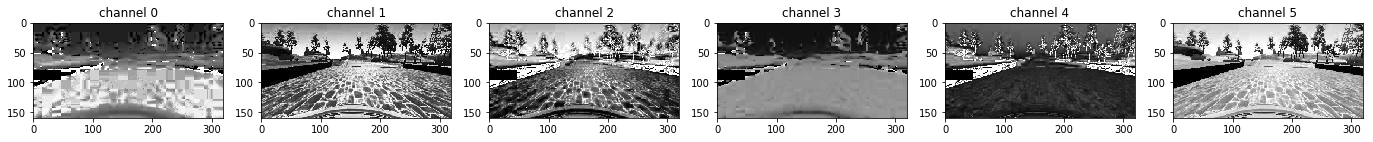

steering: 1.18113208, idx: 18


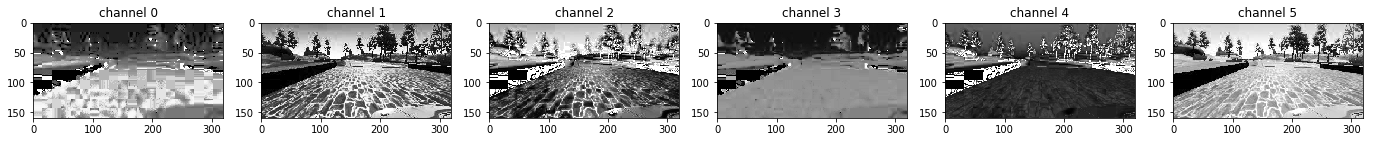

steering: 1.7811320800000001, idx: 19


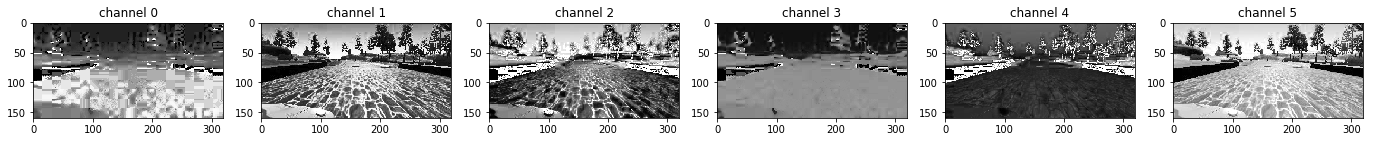

steering: 0.6811320799999999, idx: 20


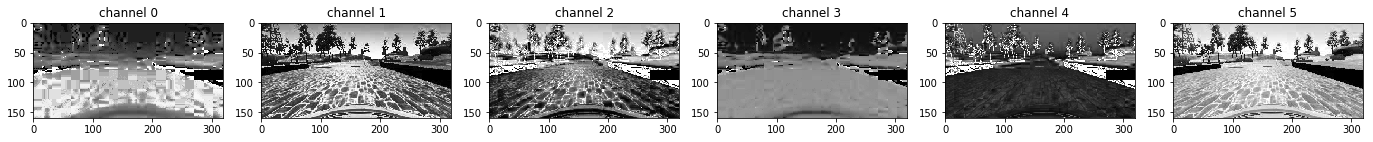

steering: -1.18113208, idx: 21


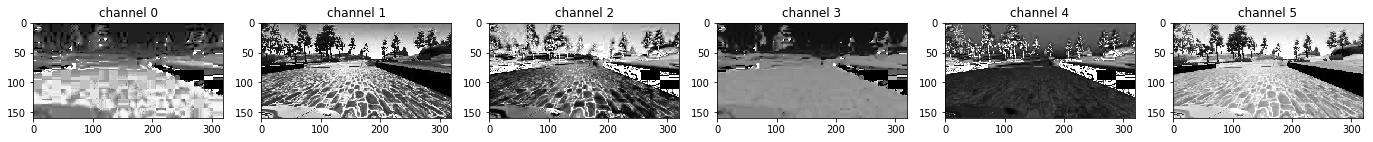

steering: -1.7811320800000001, idx: 22


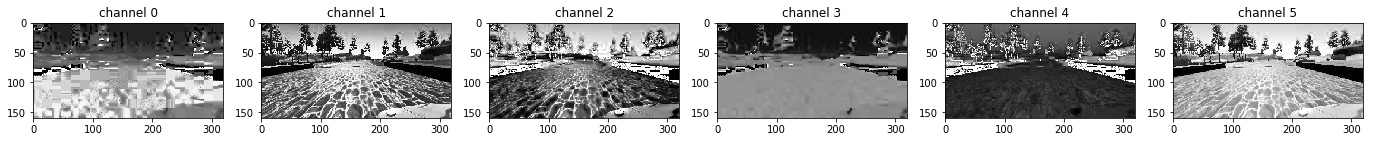

steering: -0.6811320799999999, idx: 23


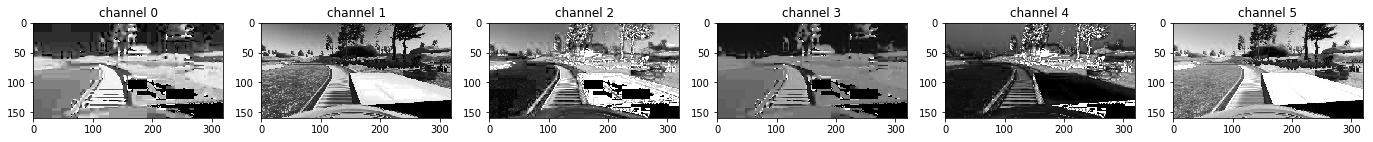

steering: -1.0, idx: 24


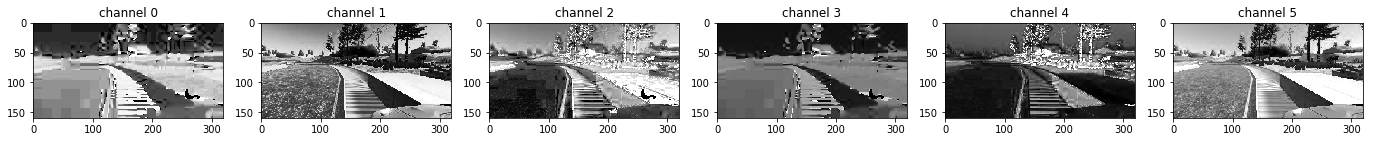

steering: -0.7, idx: 25


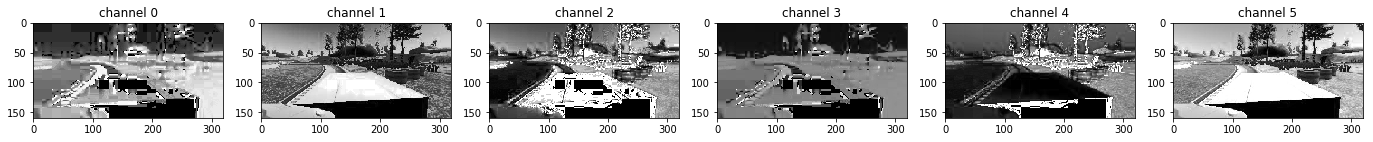

steering: -1.3, idx: 26


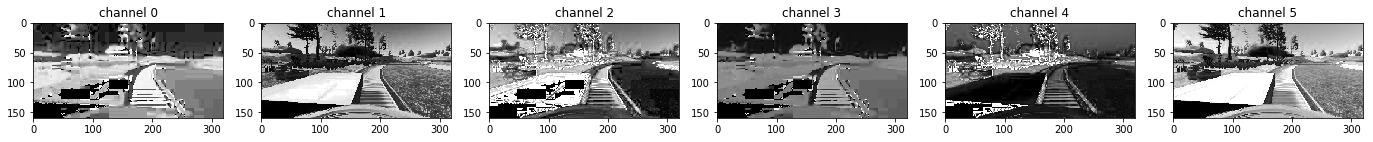

steering: 1.0, idx: 27


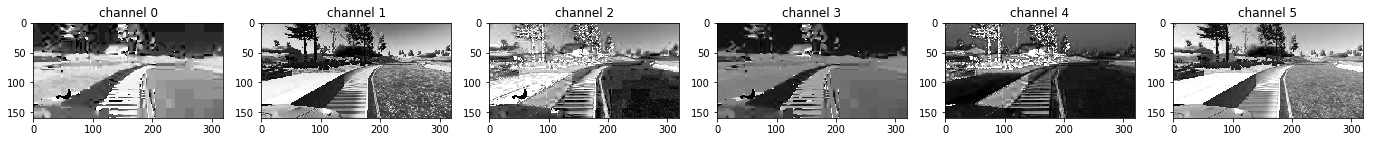

steering: 0.7, idx: 28


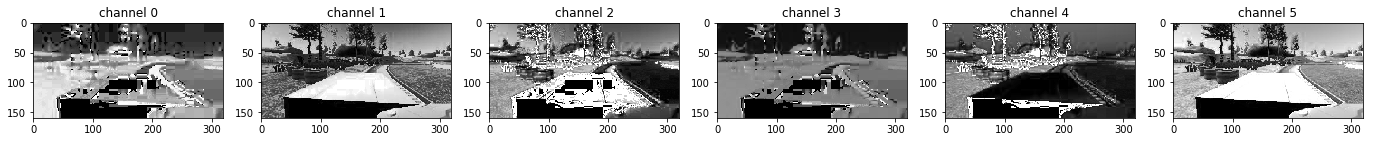

steering: 1.3, idx: 29


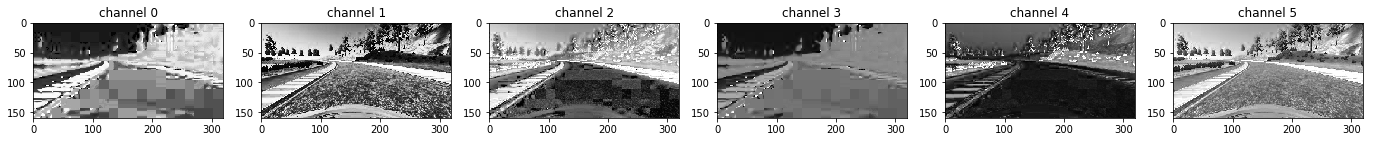

steering: 1.14339623, idx: 30


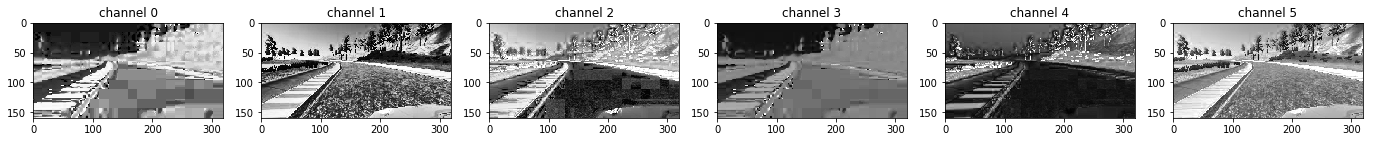

steering: 1.74339623, idx: 31


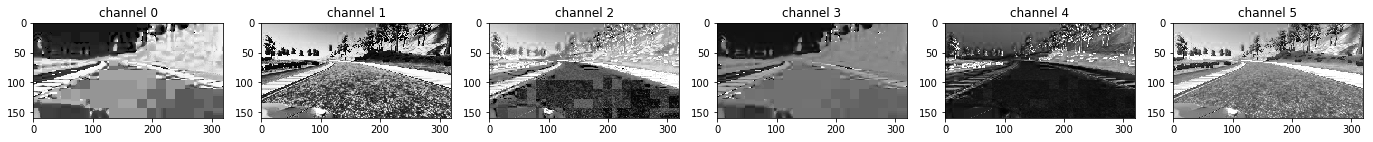

steering: 0.64339623, idx: 32


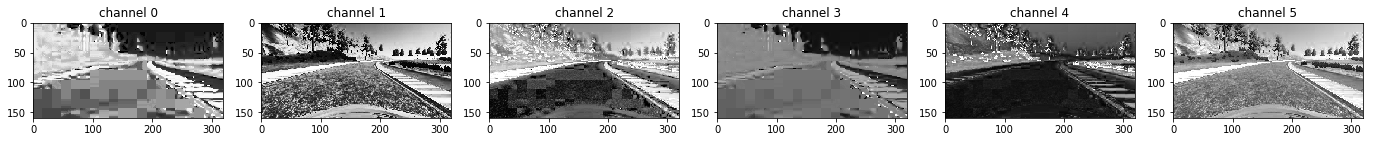

steering: -1.14339623, idx: 33


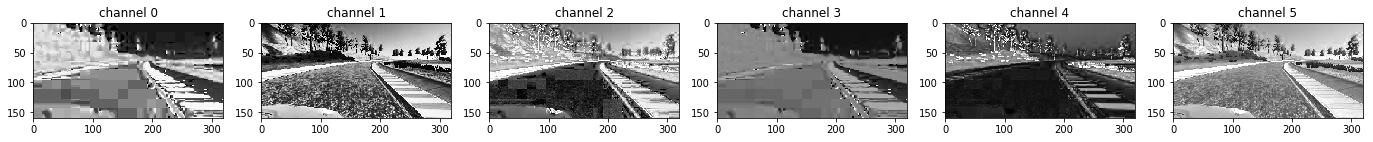

steering: -1.74339623, idx: 34


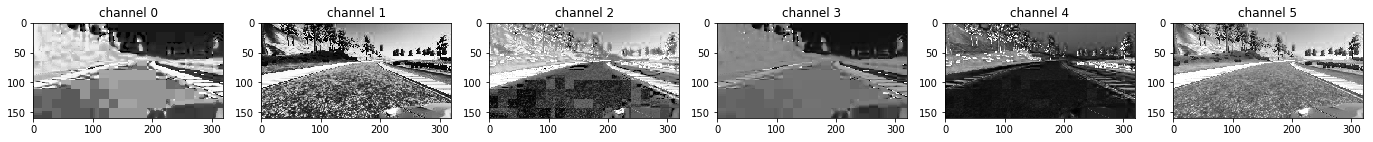

steering: -0.64339623, idx: 35
Wall time: 1min 4s


In [5]:
import matplotlib

def plot_history_objects(history_objects):
    ### print the keys contained in the history object
    #print(history_object.history.keys())
    
    loss = []
    val_loss = []
    for history_object in history_objects:
        loss.extend(history_object.history['loss'])
        val_loss.extend(history_object.history['val_loss'])

    ### plot the training and validation loss for each epoch
    plt.plot(val_loss)
    plt.plot(loss)
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['validation set','training set',], loc='upper right')
    plt.yscale('log')
    plt.show()
    
def plot_history_object(history_object):
    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()
        
def visualise_dataset(image,label,steps):
    plt_num = 1
    print(image.shape)
    step_size = int(image.shape[0]/steps)
    for image_idx in range(0,image.shape[0],step_size):
        channels = image.shape[3]
        plt.figure(plt_num, figsize=(32,32))
        for channel in range(channels):
            plt.subplot(4,8, channel+1) # sets the number of feature maps to show on each row and column
            plt.title('channel ' + str(channel)) # displays the feature map number
            plt.imshow(image[image_idx,:,:,channel], interpolation="nearest",cmap="gray") # cmap="gist_earth_r"
        plt.show()
        print('steering: {1}, idx: {0}'.format(image_idx,label[image_idx],))

for _ in range(10):
    batch_x,batch_y = next(train_generator)
    
%time visualise_dataset(batch_x,batch_y,steps=batch_x.shape[0])


In [6]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D, SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback, RemoteMonitor

import keras
import tensorflow as tf

# Hyperparameter Compile
loss= 'mse' # 'hinge'
optimizer= keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004) #'Nadam' #'rmsprop'

# Hyperparameter Fit
rounds = 1
n_batches = len(df_train)//batch_size_single

nb_epoch= 6 # n_batches * rounds
batch_size = batch_size_single * 6
patience=5000

print('nb_epoch   \t: {:>5}'.format(nb_epoch))
print('batch_size \t: {:>5}'.format(batch_size))
print('patience   \t: {:>5}'.format(patience))

image_shape = batch_x.shape[1:]

def model_a():
    model = Sequential()
    #model.add(Cropping2D(cropping=((65,23), (0,0)), input_shape=image_shape)) #23
    model.add(Cropping2D(cropping=((33,23), (0,0)), input_shape=image_shape)) #23
    model.add(Lambda(lambda x: x/127.5 - 1.))
    output_shape = ((model.layers[-1].output_shape))
    a = 4
    model.add(Convolution2D(2**(a+0), 9, 9, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+1), 7, 7, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+2), 5, 5, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(2**(a+3), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+4), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+5), 3, 3, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  
    model.add(Flatten())
    model.add(Dropout(.66))
    model.add(Dense(4**4, activation = 'elu'))
    model.add(Dense(3**3, activation = 'linear'))
    model.add(Dense(2**2, activation = 'linear'))
    model.add(Dense(1**1, activation = 'linear'))
    return model


try:
    #model = load_model('model.h5')
    model = model_a()
    print("model init done")
    model.load_weights("model.h5")
    print("load_weights done")
except:
    print("load_weights failed")
    model = model_a()
  
model.summary()

%time model.compile(loss=loss, optimizer=optimizer)

losses = []
def save_loss(epoch, logs):
    #print(epoch)
    try:
        #print(logs)
        losses.append(logs['loss'])
        #plt.plot(losses)
        #plt.title('loss history')
        #plt.ylabel('loss')
        #plt.xlabel('batch')
        #plt.yscale('log')
        #plt.show()
    except:
        pass

def callbacks():
    remote = RemoteMonitor()
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience,verbose=1,)
    model_checkpoit = ModelCheckpoint('model.h5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    save_loss_callback = LambdaCallback(on_batch_end=save_loss)
    #return [remote, early_stopping,model_checkpoit,save_loss_callback]
    return [model_checkpoit]



nb_epoch   	:     6
batch_size 	:    36
patience   	:  5000
model init done
load_weights done
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 104, 320, 6)   0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 104, 320, 6)   0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 52, 160, 16)   7792        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 80, 32)    25120       convolution2d_1[0][0]          

Epoch 1/6
216/216 [==============================] - 52s - loss: 0.1187 - val_loss: 0.0536
Epoch 2/6
216/216 [==============================] - 41s - loss: 0.2576 - val_loss: 0.1368
Epoch 3/6
216/216 [==============================] - 41s - loss: 0.0801 - val_loss: 0.1203
Epoch 4/6
216/216 [==============================] - 40s - loss: 0.1064 - val_loss: 0.1665
Epoch 5/6
216/216 [==============================] - 40s - loss: 0.0651 - val_loss: 0.0236
Epoch 6/6
216/216 [==============================] - 41s - loss: 0.1311 - val_loss: 0.0956


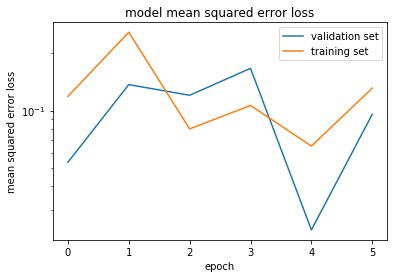

Epoch 1/6
216/216 [==============================] - 43s - loss: 0.1259 - val_loss: 0.0475
Epoch 2/6
216/216 [==============================] - 40s - loss: 0.1131 - val_loss: 0.0420
Epoch 3/6
216/216 [==============================] - 40s - loss: 0.1000 - val_loss: 0.0560
Epoch 4/6
216/216 [==============================] - 42s - loss: 0.0844 - val_loss: 0.0724
Epoch 5/6
216/216 [==============================] - 41s - loss: 0.0665 - val_loss: 0.0500
Epoch 6/6
216/216 [==============================] - 41s - loss: 0.0697 - val_loss: 0.0389


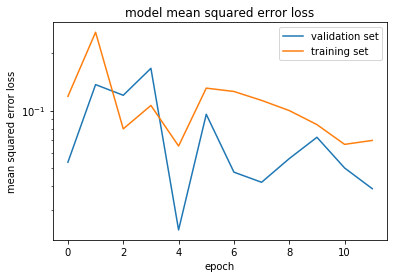

Epoch 1/6
216/216 [==============================] - 43s - loss: 0.0846 - val_loss: 0.0535
Epoch 2/6
216/216 [==============================] - 44s - loss: 0.0579 - val_loss: 0.0215
Epoch 3/6


In [ ]:
history_objects = []
while(1):
    #history_object = model.fit_generator(generator = train_generator, \
    #                                     steps_per_epoch = batch_size*6, \
    #                                     epochs=1, \
    #                                     verbose=1, \
    #                                     callbacks=callbacks(), \
    #                                     validation_data= validation_generator, \
    #                                     validation_steps=6, \
    #                                     class_weight=None, \
    #                                     max_q_size=10, \
    #                                     workers=1, \
    #                                     pickle_safe=False, \
    #                                     initial_epoch=0)
    
    
    history_object = model.fit_generator(generator         = train_generator, \
                        samples_per_epoch = batch_size*6, \
                        validation_data   = validation_generator, \
                        nb_epoch          = nb_epoch, \
                        nb_val_samples    = 1, \
                        callbacks         = callbacks() \
                       )
                                        
    try:
        history_objects.append(history_object)
        history_object
    except:
        pass
    
    plot_history_objects(history_objects)

#import winsound
#winsound.Beep(130,10000)

In [ ]:
def plot_loss():
    plt.plot(losses)
    plt.title('loss history')
    plt.ylabel('loss')
    plt.xlabel('batch')
    plt.yscale('log')
    plt.show()

plot_loss()

In [ ]:
model.load_weights("model.h5")


In [ ]:
def plot_history_objects(history_objects):
    ### print the keys contained in the history object
    #print(history_object.history.keys())
    
    loss = []
    val_loss = []
    for history_object in history_objects:
        loss.append(history_object.history['loss'])
        val_loss.append(history_object.history['val_loss'])

    ### plot the training and validation loss for each epoch
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()
    
plot_history_objects(history_objects)

history_object

In [ ]:
def add_steering_classes_asym(df,n_classes):
    #range_classes = sorted((df['steering']))[::int(len(df)/n_classes)][:]
    range_classes = (np.asarray(list(range(n_classes+1)))/n_classes*2 -1)
    range_classes[0] = -np.inf
    range_classes[-1] = np.inf
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if((df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes

def add_steering_classes(df,n_classes = 10):
    range_classes = sorted(np.abs(df['steering']))[::int(len(df)/n_classes)][1:]
    range_classes = np.append(np.asarray(list(range(n_classes)))[:] * range_classes[-2]/n_classes,1e6)
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if(np.abs(df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes


def df_info(df,range_classes):
    plt.plot(sorted(np.abs(df['steering'])));
    plt.show()
    plt.plot(df['classes']);
    plt.show()
    print(range_classes)
    plt.plot(sorted(df['classes']));
    plt.show()

In [ ]:
%time df, range_classes = add_steering_classes_asym(df,n_classes = 8)
#%time df, range_classes = add_steering_classes(df,n_classes = 6)
df

In [ ]:
plt.plot(sorted(df['classes'].values));
plt.show()
sorted(df['classes'].values).__repr__()
range_classes